In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# Import libraries
import glob
import pandas as pd

# Get CSV files list from a folder
path = './DataSets'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
ind_dfs = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
aio_df   = pd.concat(ind_dfs, ignore_index=True)

In [3]:
aio_df

,Unnamed: 0,song name,album,artist,featured,release_date,length(ms),popularity,acousticness,danceability,energy,liveness,tempo,valence
0,0,world.execute (me) ;,Miracle Milk,Mili,['Mili'],2016-10-12,211912,52,0.00453,0.522,0.817,0.3930,129.971,0.548
1,1,Rightfully (TV Animation Goblin Slayer opening),Rightfully (TV Animation Goblin Slayer opening),Mili,['Mili'],2018-11-18,213333,54,0.00423,0.390,0.724,0.1020,181.910,0.301
2,2,"In Hell We Live, Lament","In Hell We Live, Lament",Mili,"['Mili', 'KIHOW']",2021-12-21,223807,48,0.22800,0.450,0.558,0.2880,124.818,0.146
3,3,Mortal With You,Mortal With You,Mili,['Mili'],2022-07-06,235773,50,0.40200,0.381,0.525,0.0946,183.635,0.232
4,4,String Theocracy,To Kill a Living Book -for Library Of Ruina-,Mili,['Mili'],2021-10-29,174170,49,0.17400,0.655,0.780,0.3320,116.027,0.659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,15,How We Used To,How We Used To,Stephanie Poetri,['Stephanie Poetri'],2021-01-14,169655,29,0.74100,0.721,0.490,0.1080,75.005,0.502
466,16,Little Lifetimes,oh to be in love,Stephanie Poetri,['Stephanie Poetri'],2022-03-18,158769,28,0.75900,0.352,0.350,0.1130,91.525,0.376
467,17,Appreciate - English Version,Appreciate (English Version),Stephanie Poetri,['Stephanie Poetri'],2019-04-19,235627,30,0.17400,0.664,0.831,0.1230,119.991,0.388
468,18,Daydreaming,AM:PM,Stephanie Poetri,['Stephanie Poetri'],2021-03-12,170181,23,0.82300,0.758,0.584,0.1800,109.949,0.631


In [4]:
aio_df.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [6]:
aio_df.dtypes

song name        object
album            object
artist           object
featured         object
release_date     object
length(ms)        int64
popularity        int64
acousticness    float64
danceability    float64
energy          float64
liveness        float64
tempo           float64
valence         float64
dtype: object

In [7]:
type(aio_df['featured'][0])

str

In [8]:
aio_df['featured'] = aio_df['featured'].apply(lambda x: re.sub("['[\]]", "", x))

In [9]:
aio_df['featured'] = aio_df['featured'].apply(lambda x: x.split(sep=', '))

In [10]:
type(aio_df['featured'][0])

list

In [11]:
aio_df['featured'][0]

['Mili']

In [63]:
aio_df.to_csv('./DataSets/final.csv', sep = ',')

In [31]:
new_88df = aio_df[aio_df['featured'].apply(lambda x: len(x) == 1)]
new_88df = new_88df.reset_index(drop=True)
new_88df

,song name,album,artist,featured,release_date,length(ms),popularity,acousticness,danceability,energy,liveness,tempo,valence
0,world.execute (me) ;,Miracle Milk,Mili,[Mili],2016-10-12,211912,52,0.00453,0.522,0.817,0.3930,129.971,0.548
1,Rightfully (TV Animation Goblin Slayer opening),Rightfully (TV Animation Goblin Slayer opening),Mili,[Mili],2018-11-18,213333,54,0.00423,0.390,0.724,0.1020,181.910,0.301
2,Mortal With You,Mortal With You,Mili,[Mili],2022-07-06,235773,50,0.40200,0.381,0.525,0.0946,183.635,0.232
3,String Theocracy,To Kill a Living Book -for Library Of Ruina-,Mili,[Mili],2021-10-29,174170,49,0.17400,0.655,0.780,0.3320,116.027,0.659
4,Paper Bouquet,Paper Bouquet,Mili,[Mili],2022-04-02,208559,46,0.01140,0.563,0.867,0.2100,106.034,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,How We Used To,How We Used To,Stephanie Poetri,[Stephanie Poetri],2021-01-14,169655,29,0.74100,0.721,0.490,0.1080,75.005,0.502
251,Little Lifetimes,oh to be in love,Stephanie Poetri,[Stephanie Poetri],2022-03-18,158769,28,0.75900,0.352,0.350,0.1130,91.525,0.376
252,Appreciate - English Version,Appreciate (English Version),Stephanie Poetri,[Stephanie Poetri],2019-04-19,235627,30,0.17400,0.664,0.831,0.1230,119.991,0.388
253,Daydreaming,AM:PM,Stephanie Poetri,[Stephanie Poetri],2021-03-12,170181,23,0.82300,0.758,0.584,0.1800,109.949,0.631


In [50]:
overall_stats = new_88df.groupby('artist').agg({'danceability': ['mean'],
                                             'popularity': ['mean'],
                                             'energy': ['mean'] })
overall_stats

,danceability,popularity,energy
,mean,mean,mean
artist,,,
BIBI,0.641115,49.653846,0.518654
CHUNG HA,0.604218,35.254545,0.704509
Guapdad 4000,0.819200,37.400000,0.575100
Higher Brothers,0.763700,31.300000,0.758400
Jackson Wang,0.693200,49.066667,0.640000
Joji,0.544444,72.277778,0.460167
Mili,0.564158,38.026316,0.547184
NIKI,0.666538,57.115385,0.479538


<AxesSubplot:title={'center':'Average Feature Measure by 88Rising Artist'}, xlabel='artist'>

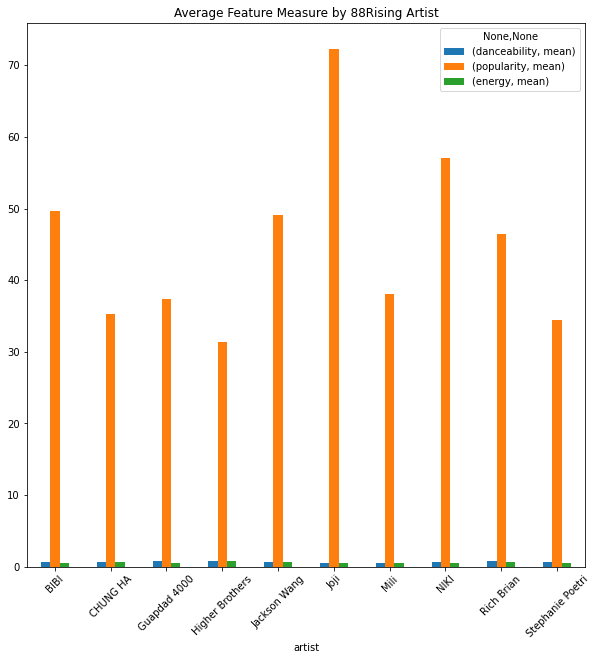

In [61]:
overall_stats.plot(
        kind='bar',
        stacked=False,
        figsize=(10,10),
        rot=45,
        title='Average Feature Measure by 88Rising Artist')

In [17]:
# file1 = './DataSets/This_Is_BIBI.csv'
# file2 = './DataSets/This_Is_CHUNG_HA.csv'
# file3 = './DataSets/This_Is_Guapdad_4000.csv'
# file4 = './DataSets/This_Is_Higher_Brothers.csv'
# file5 = './DataSets/This_Is_Jackson_Wang.csv'
# file6 = './DataSets/This_Is_Joji.csv'
# file7 = './DataSets/This_Is_Mili.csv'
# file8 = './DataSets/This_Is_NIKI.csv'
# file9 = './DataSets/This_Is_Rich_Brian.csv'
# file10 = './DataSets/This_Is_Stephanie_Poetri.csv'

In [18]:
# df1 = pd.read_csv(file1, encoding="ISO-8859-1")
# df2 = pd.read_csv(file2, encoding="ISO-8859-1")
# df3 = pd.read_csv(file3, encoding="ISO-8859-1")
# df4 = pd.read_csv(file4, encoding="ISO-8859-1")
# df5 = pd.read_csv(file5, encoding="ISO-8859-1")
# df6 = pd.read_csv(file6, encoding="ISO-8859-1")
# df7 = pd.read_csv(file7, encoding="ISO-8859-1")
# df8 = pd.read_csv(file8, encoding="ISO-8859-1")
# df9 = pd.read_csv(file9, encoding="ISO-8859-1")
# df10 = pd.read_csv(file10, encoding="ISO-8859-1")

In [19]:
# df1 = df1[df1['artist'] == 'BIBI'] 
# df2 = df2[df2['artist'] == 'CHUNG HA'] 
# df3 = df3[df3['artist'] == 'Jackson Wang'] 
# df4 = df4[df4['artist'] == 'Joji'] 
# df5 = df5[df5['artist'] == 'Mili'] 
# df6 = df6[df6['artist'] == 'NIKI'] 
# df7 = df7[df7['artist'] == 'Rich Brian'] 
# df8 = df8[df8['artist'] == 'Stephani Poetri'] 
# df9 = df9[df9['artist'] == 'Guapdad 4000'] 
# df10 = df10[df10['artist'] == 'Higher Brothers'] 


In [20]:
# Rising88DF = pd.concat([df1,df2, df3,df4,df5,df5,df6,df7,df8,df9,df10])

In [21]:
# new_df = Rising88DF.rename(
#     columns={"Unnamed: 0": "ID"})

In [22]:
# new_df

In [23]:
# #reset index
# new_df.reset_index(drop=True, inplace=True)

In [24]:
# new_df.drop_duplicates("song name", inplace=True)

In [25]:
# new_df

In [26]:
# new_df.set_index(['ID'], inplace=True)

In [27]:
# new_df

In [28]:
# new_df.to_csv('./DataSets/final88data.csv', sep = ',')

In [29]:
#Filter Collab below 